In [4]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [5]:
# create a set of random lat and long combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# add the lats and longs to a list
coordinates = list(lat_lngs)

In [7]:
# create a list for holding cities
cities = []

# id the nearest city for each lat/long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# print city count to confirm sufficient count
len(cities)

609

In [12]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

# url for weather map api
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [14]:
# import time library and datetime mod
import time
from datetime import datetime

In [18]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print('Beginning Data Retrieval')
print('------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all cities in list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create endpoint url w/ each city
    city_url = url + '&q=' + city.replace(' ','+')
    
    # log the url, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # add 1 to record count
    record_count += 1
    
    # run an api req for each of the cities
    try:
        # parse json and retrieve data
        city_weather = requests.get(city_url).json()
        
        # parse out needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # convert date to ISO
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # append city info to city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
    # if error, skip the city
    except:
        print('City not found. Skipping...')
        pass
    
# indicate that data loading is complete
print('------------------------')
print('Data Retrieval Complete.')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | pedernales
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | ewa beach
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | yukamenskoye
Processing Record 9 of Set 1 | warqla
City not found. Skipping...
Processing Record 10 of Set 1 | hovd
Processing Record 11 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | gizo
Processing Record 14 of Set 1 | awbari
Processing Record 15 of Set 1 | san quintin
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | vestmannaeyjar
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | mitu
Processing Record 21 of Set 1 | tacna
Processing Record 22 of Set 1 | verkhn

Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | tessalit
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | filingue
Processing Record 42 of Set 4 | tabory
Processing Record 43 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | puerto ayora
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | cap malheureux
Processing Record 49 of Set 4 | kovur
Processing Record 50 of Set 4 | dandong
Processing Record 1 of Set 5 | timizart
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | jaipur hat
City not found. Skipping...
Processing Record 4 of Set 5 | guasdualito
Processing Record 5 of Set 5 | meadow lake
Processing Record 6 of Set 5 | labutta
City not found. Skipping...
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | northam
Processing Record 

Processing Record 25 of Set 8 | haines junction
Processing Record 26 of Set 8 | isangel
Processing Record 27 of Set 8 | florida
Processing Record 28 of Set 8 | pangody
Processing Record 29 of Set 8 | yumen
Processing Record 30 of Set 8 | asau
Processing Record 31 of Set 8 | cedar city
Processing Record 32 of Set 8 | maragogi
Processing Record 33 of Set 8 | cervo
Processing Record 34 of Set 8 | tyrma
Processing Record 35 of Set 8 | lithakia
Processing Record 36 of Set 8 | urulga
City not found. Skipping...
Processing Record 37 of Set 8 | ocampo
Processing Record 38 of Set 8 | balkanabat
Processing Record 39 of Set 8 | kangaatsiaq
Processing Record 40 of Set 8 | ayan
Processing Record 41 of Set 8 | ornskoldsvik
Processing Record 42 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 43 of Set 8 | benghazi
Processing Record 44 of Set 8 | athni
Processing Record 45 of Set 8 | sao joao do piaui
Processing Record 46 of Set 8 | owensboro
Processing Record 47 of Set 8 | wande

Processing Record 12 of Set 12 | hargeysa
Processing Record 13 of Set 12 | ilulissat
Processing Record 14 of Set 12 | puerto escondido
Processing Record 15 of Set 12 | rota
Processing Record 16 of Set 12 | mason city
Processing Record 17 of Set 12 | puerto montt
Processing Record 18 of Set 12 | bondo
Processing Record 19 of Set 12 | izhma
Processing Record 20 of Set 12 | rantauprapat
Processing Record 21 of Set 12 | rio casca
Processing Record 22 of Set 12 | marrakesh
Processing Record 23 of Set 12 | orotukan
Processing Record 24 of Set 12 | bagaha
Processing Record 25 of Set 12 | jaguaruana
Processing Record 26 of Set 12 | sergeyevka
Processing Record 27 of Set 12 | srednekolymsk
Processing Record 28 of Set 12 | ambon
Processing Record 29 of Set 12 | umm durman
City not found. Skipping...
Processing Record 30 of Set 12 | ternate
Processing Record 31 of Set 12 | burnie
Processing Record 32 of Set 12 | bam
Processing Record 33 of Set 12 | morros
Processing Record 34 of Set 12 | christch

In [19]:
len(city_data)

559

In [20]:
# convert array of dictionaries to pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,-41.44,100,94,5.21,RU,2022-01-25 18:55:16
1,Vardo,70.3705,31.1107,28.60,80,40,26.46,NO,2022-01-25 18:55:17
2,Pedernales,18.0384,-71.7440,83.73,55,2,4.23,DO,2022-01-25 18:55:17
3,Hermanus,-34.4187,19.2345,68.81,73,66,14.94,ZA,2022-01-25 18:55:18
4,Ewa Beach,21.3156,-158.0072,76.69,73,92,15.79,US,2022-01-25 18:55:18
5,Thompson,55.7435,-97.8558,-18.24,69,20,5.75,CA,2022-01-25 18:55:19
6,Bredasdorp,-34.5322,20.0403,68.29,68,100,8.05,ZA,2022-01-25 18:55:20
7,Yukamenskoye,57.8865,52.2416,3.34,96,80,6.98,RU,2022-01-25 18:55:20
8,Hovd,48.0056,91.6419,-9.38,81,96,4.45,MN,2022-01-25 18:55:21
9,Port Alfred,-33.5906,26.8910,71.65,84,52,7.85,ZA,2022-01-25 18:55:22


In [23]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [26]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]

In [27]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-01-25 18:55:16,68.7500,161.3000,-41.44,100,94,5.21
1,Vardo,NO,2022-01-25 18:55:17,70.3705,31.1107,28.60,80,40,26.46
2,Pedernales,DO,2022-01-25 18:55:17,18.0384,-71.7440,83.73,55,2,4.23
3,Hermanus,ZA,2022-01-25 18:55:18,-34.4187,19.2345,68.81,73,66,14.94
4,Ewa Beach,US,2022-01-25 18:55:18,21.3156,-158.0072,76.69,73,92,15.79
5,Thompson,CA,2022-01-25 18:55:19,55.7435,-97.8558,-18.24,69,20,5.75
6,Bredasdorp,ZA,2022-01-25 18:55:20,-34.5322,20.0403,68.29,68,100,8.05
7,Yukamenskoye,RU,2022-01-25 18:55:20,57.8865,52.2416,3.34,96,80,6.98
8,Hovd,MN,2022-01-25 18:55:21,48.0056,91.6419,-9.38,81,96,4.45
9,Port Alfred,ZA,2022-01-25 18:55:22,-33.5906,26.8910,71.65,84,52,7.85


In [28]:
# create output file, csv
output_data_file = 'weather_data/cities.csv'

# export city_data into csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [29]:
# extract relevant fields from df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

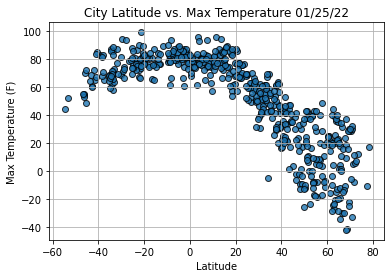

In [30]:
# build scatter plot for lat v max temp
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()

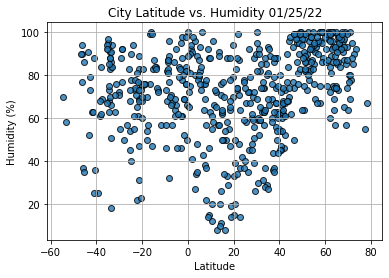

In [31]:
# build scatter plot for lat v humidity
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig2.png')

# show plot
plt.show()

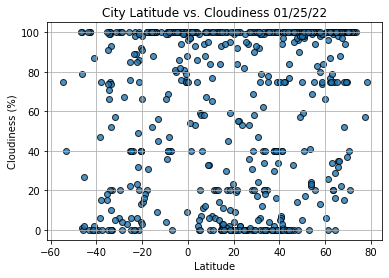

In [32]:
# build scatter plot for lat v cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig3.png')

# show plot
plt.show()

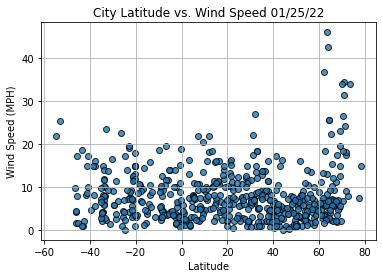

In [33]:
# build scatter plot for lat v wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig4.png')

# show plot
plt.show()